In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper

# Look pretty...
# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

# Do * NOT * alter this line, until instructed!
scaleFeatures = True

In [68]:
# TODO: Load up the dataset and remove any and all
# Rows that have a nan. You should be a pro at this
# by now ;-)
#
# QUESTION: Should the id column be included as a
# feature?
#
file = pd.read_csv('Datasets/kidney_disease.csv')
file = file.dropna()
df = file

In [69]:
# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [70]:
# TODO: Use an indexer to select only the following columns:
#       ['bgr','wc','rc']
df = df[['bgr','wc','rc']]
# TODO: Print out and check your dataframe's dtypes. You'll might
# want to set a breakpoint after you print it out so you can stop the
# program's execution.
df.columns

Index(['bgr', 'wc', 'rc'], dtype='object')

In [71]:
#You can either take a look at the dataset webpage in the attribute info
# section: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
# or you can actually peek through the dataframe by printing a few rows.
# What kind of data type should these three columns be? If Pandas didn't
# properly detect and convert them to that data type for you, then use
# an appropriate command to coerce these features into the right type.
df.wc = pd.to_numeric(df.wc)
df.rc = pd.to_numeric(df.rc)
df.dtypes

D:\anaconda\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


bgr    float64
wc       int64
rc     float64
dtype: object

In [72]:
# TODO: PCA Operates based on variance. The variable with the greatest
# variance will dominate. Go ahead and peek into your data using a
# command that will check the variance of every feature in your dataset.
# Print out the results. Also print out the results of running .describe
# on your dataset.
#
# Hint: If you don't see all three variables: 'bgr','wc' and 'rc', then
# you probably didn't complete the previous step properly.
df.var()

bgr    4.217182e+03
wc     9.777380e+06
rc     1.039104e+00
dtype: float64

In [73]:
# TODO: This method assumes your dataframe is called df. If it isn't,
# make the appropriate changes. Don't alter the code in scaleFeatures()
# just yet though!
#
# .. your code adjustment here ..
if scaleFeatures: df = helper.scaleFeatures(df)

New Variances:
 bgr    1.006369
wc     1.006369
rc     1.006369
dtype: float64
New Describe:
                 bgr            wc            rc
count  1.580000e+02  1.580000e+02  1.580000e+02
mean  -9.755075e-17  9.345548e-17  1.068063e-16
std    1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -1.500159e+00 -2.747446e+00
25%   -5.305059e-01 -6.259123e-01 -3.855519e-01
50%   -2.447210e-01 -2.168611e-01  5.730335e-02
75%    6.306235e-03  4.167672e-01  6.969831e-01
max    5.540492e+00  5.750474e+00  3.058878e+00


In [74]:
# TODO: Run PCA on your dataset and reduce it to 2 components
# Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
T = pca.transform(df)

Features by importance:
 [(3.9998071556884853, 'wc'), (3.2588876641210898, 'bgr'), (3.0097527529983648, 'rc')]


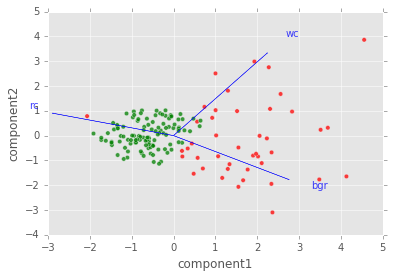

In [75]:
# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in
# Module4/assignment1.py, this time we'll convert to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:
%matplotlib inline
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()


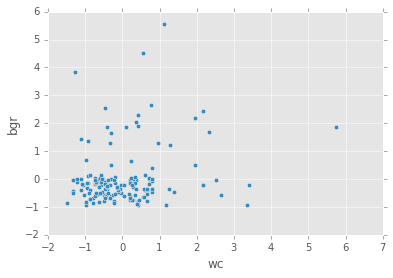

In [76]:
df.plot.scatter(x='wc', y='bgr')